[1] 미분 만들기 / 풀기

In [ ]:
import sympy
import numpy
from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [ ]:
w = sympy.Symbol('w', real=True)

f=w ** 2 + 3*w -5
print(f)
fprime = f.diff(w)
fprime
sympy.solve(fprime,w)

[2] Gradient Descent: 미분한 값이 0에 가까워지도록 하는 방법

In [ ]:
##기울기 값을 구하는 함수
fpnum = sympy.lambdify(w, fprime)
type(fpnum)

function

what is lambdify?
[링크 텍스트](https://datastory1.blogspot.com/2018/11/sympy-operation.html)

lambdify ; 식의 심벌, 식, 연산을 위해 사용하는 모듈이름이다.
*fprime은 미분해주는 식: f.diff(w)


In [ ]:
fpnum= sympy.lambdify(w, fprime)
w= 10.0

for i in range(1000):
  w = w - fpnum(w)*0.01  #코드 이해X 
print(w)

3.8708249494590063e-08
-1.4999999806458753


[3] linear regression

먼저 100개의 데이터 생성하기

In [ ]:
x_data = numpy.linspace(-5,5,100)
w_true = 2
b_true = 20
y_data = w_true*x_data + b_true + numpy.random.normal(size=len(x_data))
pyplot.scatter(x_data,y_data)

Gradient descent방법<-cost function을 최소로하는 w,b값 구하기

In [ ]:
w, b, x, y = sympy.symbols('w b x y ')

cost_function = (w*x + b -y)**2
print('#1.cost function : ',cost_function)
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b),'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w),'numpy')

w,b = 0,0
for i in range(1000):
  descent_b = numpy.sum(grad_b(w,b,x_data,y_data)/len(x_data)) #왜 2는 안나누지??
  descent_w = numpy.sum(grad_w(w,b,x_data,y_data)/len(x_data))
  w = w - descent_w*0.01


#1.cost function :  (b + w*x - y)**2


예제: 지구 온도를 linear regression으로 표현하기
(x=year y=temperature)

In [ ]:
import numpy
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

fname = '/content/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

(도표화 시키기)

In [ ]:
from matplotlib import pyplot
%matplotlib inline

pyplot.plot(year, temp_anomaly); #1st pic

pyplot.rc('font', family='serif', size='18')
pyplot.figure(figsize=(10,5))
#plot
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid(); #2nd pic

w와 b에 대해서 미분 한 값 구하기

In [ ]:
w = numpy.sum(temp_anomaly*(year-year.mean())) / numpy.sum(year*(year-year.mean()))
b = a_0 = temp_anomaly.mean() - w*year.mean() #코드 이해 미분공식과 파이썬 공식간의 연결이 안된다.
print(w)
print(b)

0.01037028394347266
-20.148685384658464


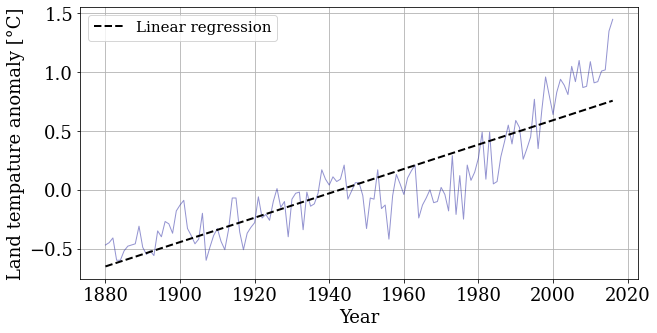

In [ ]:
reg= b+ w*year

pyplot.figure(figsize=(10,5))
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land tempature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();